# Basic features and readability scores
>  Learn to compute basic features such as number of words, number of characters, average word length and number of special characters (such as Twitter hashtags and mentions). You will also learn to compute readability scores and determine the amount of education required to comprehend a piece of text.

- toc: true 
- badges: true
- comments: true
- author: Lucas Nunes
- categories: [Python, Datacamp, Machine Learning]
- image: images/datacamp/1_supervised_learning_with_scikit_learn/2_regression.png

> Note: This is a summary of the course's chapter 1 exercises "Feature Engineering for NLP in Python" at datacamp. <br>[Github repo](https://github.com/lnunesAI/Datacamp/) / [Course link](https://www.datacamp.com/tracks/machine-learning-scientist-with-python)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (8, 8)

## Introduction to NLP feature engineering

### Data format for ML algorithms

<div class=""><p>In this exercise, you have been given four dataframes <code>df1</code>, <code>df2</code>, <code>df3</code> and <code>df4</code>. The final column of each dataframe is the predictor variable and the rest of the columns are training features. </p>
<p>Using the console, determine which dataframe is in a suitable format to be trained by a classifier.</p></div>

In [2]:
df1 = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/13-Feature%20Engineering%20for%20NLP%20in%20Python/datasets/df1.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/13-Feature%20Engineering%20for%20NLP%20in%20Python/datasets/df2.csv')
df3 = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/13-Feature%20Engineering%20for%20NLP%20in%20Python/datasets/df3.csv')
df4 = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/13-Feature%20Engineering%20for%20NLP%20in%20Python/datasets/df4.csv')

In [3]:
df1.head()

,feature 1,feature 2,feature 3,feature 4,feature 5,label
0,29.0000,0,0,211.3375,female,1
1,0.9167,1,2,151.5500,male,1
2,2.0000,1,2,151.5500,female,0
3,30.0000,1,2,151.5500,male,0
4,25.0000,1,2,151.5500,female,0


In [4]:
df2.head()

,feature 1,feature 2,feature 3,feature 4,feature 5,label
0,-1.745293,-0.837162,-0.885481,-0.190082,-0.111161,-2.835741
1,-1.113249,-1.101384,1.132069,0.361661,-0.265301,-0.320568
2,0.055839,1.207450,-0.899675,0.933430,0.382975,-0.713869
3,0.816374,0.698360,0.497912,-0.298097,-0.196820,-1.832008
4,-0.785005,0.745289,-1.212070,0.291087,1.334375,0.848035


In [5]:
df3.head()

,feature 1,feature 2,feature 3,feature 4,feature 5,label
0,1,85,66,29,0,0
1,8,183,64,0,0,1
2,1,89,66,23,94,0
3,0,137,40,35,168,1
4,5,116,74,0,0,0


In [6]:
df4.head()

,feature 1,label
0,"Led by Woody, Andy's toys live happily in his ...",1
1,When siblings Judy and Peter discover an encha...,0
2,A family wedding reignites the ancient feud be...,1
3,"Cheated on, mistreated and stepped on, the wom...",1
4,Just when George Banks has recovered from his ...,0


<pre>
Possible Answers

df1

df2

<b>df3</b>

df4

</pre>

**This dataframe has numerical training features and the predictor variable is a class. Therefore, it is in a suitable format for applying a classification algorithm.**

### One-hot encoding

<div class=""><p>In the previous exercise, we encountered a dataframe <code>df1</code> which contained categorical features and therefore, was unsuitable for applying ML algorithms to.</p>
<p>In this exercise, your task is to convert <code>df1</code> into a format that is suitable for machine learning.</p></div>

Instructions 1/3
<li>Use the <code>columns</code> attribute to print the features of <code>df1</code>.</li>

In [7]:
# Print the features of df1
print(df1.columns)

Index(['feature 1', 'feature 2', 'feature 3', 'feature 4', 'feature 5',
       'label'],
      dtype='object')


Instructions 2/3
<li>Use the <code>pd.get_dummies()</code> function to perform one-hot encoding on <code>feature 5</code> of <code>df1</code>.</li>

In [9]:
# Perform one-hot encoding
df1 = pd.get_dummies(df1, columns=['feature 5'])

Instructions 3/3
<ul>
<li>Use the <code>columns</code> attribute again to print the new features of <code>df1</code>.</li>
<li>Print the first five rows of <code>df1</code> using <code>head()</code>.</li>
</ul>

In [11]:
# Print the new features of df1
print(df1.columns)

# Print first five rows of df1
df1.head()

Index(['feature 1', 'feature 2', 'feature 3', 'feature 4', 'label',
       'feature 5_female', 'feature 5_male'],
      dtype='object')


,feature 1,feature 2,feature 3,feature 4,label,feature 5_female,feature 5_male
0,29.0000,0,0,211.3375,1,1,0
1,0.9167,1,2,151.5500,1,0,1
2,2.0000,1,2,151.5500,0,1,0
3,30.0000,1,2,151.5500,0,0,1
4,25.0000,1,2,151.5500,0,1,0


**You have successfully performed one-hot encoding on this dataframe. Notice how the feature 5 (which represents sex) gets converted to two features feature 5_male and feature 5_female. With one-hot encoding performed, df1 only contains numerical features and can now be fed into any standard ML model!**

## Basic feature extraction

### Character count of Russian tweets

<div class=""><p>In this exercise, you have been given a dataframe <code>tweets</code> which contains some tweets associated with Russia's Internet Research Agency and compiled by FiveThirtyEight. </p>
<p>Your task is to create a new feature 'char_count' in <code>tweets</code> which computes the number of characters for each tweet. Also, compute the average length of each tweet. The tweets are available in the <code>content</code> feature of <code>tweets</code>.</p>
<p><em>Be aware that this is real data from Twitter and as such there is always a risk that it may contain profanity or other offensive content (in this exercise, and any following exercises that also use real Twitter data).</em></p></div>

In [12]:
tweets = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/13-Feature%20Engineering%20for%20NLP%20in%20Python/datasets/tweets_1000x1.csv')

Instructions
<ul>
<li>Create a new feature <code>char_count</code> by applying <code>len</code> to the 'content' feature of <code>tweets</code>.</li>
<li>Print the average character count of the tweets by computing the mean of the 'char_count' feature.</li>
</ul>

In [13]:
# Create a feature char_count
tweets['char_count'] = tweets['content'].apply(len)

# Print the average character count
print(tweets['char_count'].mean())

103.462


**Notice that the average character count of these tweets is approximately 104, which is much higher than the overall average tweet length of around 40 characters. Depending on what you're working on, this may be something worth investigating into. For your information, there is research that indicates that fake news articles tend to have longer titles! Therefore, even extremely basic features such as character counts can prove to be very useful in certain applications.**

### Word count of TED talks

<div class=""><p><code>ted</code> is a dataframe that contains the transcripts of 500 TED talks. Your job is to compute a new feature <code>word_count</code> which contains the approximate number of words for each talk. Consequently, you also need to compute the average word count of the talks. The transcripts are available as the <code>transcript</code> feature in <code>ted</code>.</p>
<p>In order to complete this task, you will need to define a function <code>count_words</code> that takes in a string as an argument and returns the number of words in the string. You will then need to apply this function to the <code>transcript</code> feature of <code>ted</code> to create the new feature <code>word_count</code> and compute its mean.</p></div>

In [14]:
ted = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/13-Feature%20Engineering%20for%20NLP%20in%20Python/datasets/ted_500x1.csv')

Instructions
<ul>
<li>Split <code>string</code> into a list of words using the <code>split()</code> method.</li>
<li>Return the number of elements in <code>words</code> using <code>len()</code>.</li>
<li>Apply your function to the <code>transcript</code> column of <code>ted</code> to create the new feature <code>word_count</code>.</li>
<li>Compute the average word count of the talks using <code>mean()</code>.</li>
</ul>

In [15]:
# Function that returns number of words in a string
def count_words(string):
	# Split the string into words
    words = string.split()
    
    # Return the number of words
    return len(words)

# Create a new feature word_count
ted['word_count'] = ted['transcript'].apply(count_words)

# Print the average word count of the talks
print(ted['word_count'].mean())

1987.1


**You now know how to compute the number of words in a given piece of text. Also, notice that the average length of a talk is close to 2000 words. You can use the word_count feature to compute its correlation with other variables such as number of views, number of comments, etc. and derive extremely interesting insights about TED.**

### Hashtags and mentions in Russian tweets

<div class=""><p>Let's revisit the <code>tweets</code> dataframe containing the Russian tweets. In this exercise, you will compute the number of hashtags and mentions in each tweet by defining two functions <code>count_hashtags()</code> and <code>count_mentions()</code> respectively and applying them to the <code>content</code> feature of <code>tweets</code>. </p>
<p>In case you don't recall, the tweets are contained in the <code>content</code> feature of <code>tweets</code>.</p></div>

Instructions 1/2
<p>In the list comprehension, use <code>startswith()</code> to check if a particular <code>word</code> starts with <code>'#'</code>.</p>

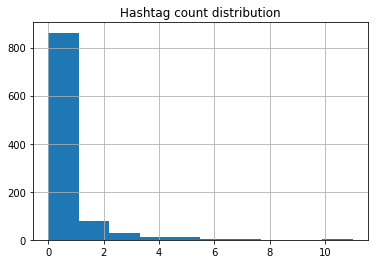

In [16]:
# Function that returns numner of hashtags in a string
def count_hashtags(string):
	# Split the string into words
    words = string.split()
    
    # Create a list of words that are hashtags
    hashtags = [word for word in words if word.startswith('#')]
    
    # Return number of hashtags
    return(len(hashtags))

# Create a feature hashtag_count and display distribution
tweets['hashtag_count'] = tweets['content'].apply(count_hashtags)
tweets['hashtag_count'].hist()
plt.title('Hashtag count distribution')
plt.show()

Instructions 2/2
<p>In the list comprehension, use <code>startswith()</code> to check if a particular <code>word</code> starts with '@'.</p>

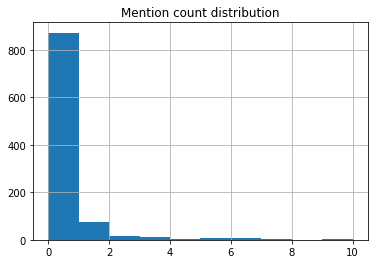

In [17]:
# Function that returns number of mentions in a string
def count_mentions(string):
	# Split the string into words
    words = string.split()
    
    # Create a list of words that are mentions
    mentions = [word for word in words if word.startswith('@')]
    
    # Return number of mentions
    return(len(mentions))

# Create a feature mention_count and display distribution
tweets['mention_count'] = tweets['content'].apply(count_mentions)
tweets['mention_count'].hist()
plt.title('Mention count distribution')
plt.show()

**You now have a good grasp of how to compute various types of summary features. In the next lesson, we will learn about more advanced features that are capable of capturing more nuanced information beyond simple word and character counts.**

## Readability tests

### Readability of 'The Myth of Sisyphus'

<div class=""><p>In this exercise, you will compute the Flesch reading ease score for Albert Camus' famous essay <em>The Myth of Sisyphus</em>. We will then interpret the value of this score as explained in the video and try to determine the reading level of the essay.</p>
<p>The entire essay is in the form of a string and is available as <code>sisyphus_essay</code>.</p></div>

In [21]:
!pip install textatistic
sisyphus_essay = '\nThe gods had condemned Sisyphus to ceaselessly rolling a rock to the top of a mountain, whence the stone would fall back of its own weight. They had thought with some reason that there is no more dreadful punishment than futile and hopeless labor. If one believes Homer, Sisyphus was the wisest and most prudent of mortals. According to another tradition, however, he was disposed to practice the profession of highwayman. I see no contradiction in this. Opinions differ as to the reasons why he became the futile laborer of the underworld. To begin with, he is accused of a certain levity in regard to the gods. He stole their secrets. Egina, the daughter of Esopus, was carried off by Jupiter. The father was shocked by that disappearance and complained to Sisyphus. He, who knew of the abduction, offered to tell about it on condition that Esopus would give water to the citadel of Corinth. To the celestial thunderbolts he preferred the benediction of water. He was punished for this in the underworld. Homer tells us also that Sisyphus had put Death in chains. Pluto could not endure the sight of his deserted, silent empire. He dispatched the god of war, who liberated Death from the hands of her conqueror. It is said that Sisyphus, being near to death, rashly wanted to test his wife\'s love. He ordered her to cast his unburied body into the middle of the public square. Sisyphus woke up in the underworld. And there, annoyed by an obedience so contrary to human love, he obtained from Pluto permission to return to earth in order to chastise his wife. But when he had seen again the face of this world, enjoyed water and sun, warm stones and the sea, he no longer wanted to go back to the infernal darkness. Recalls, signs of anger, warnings were of no avail. Many years more he lived facing the curve of the gulf, the sparkling sea, and the smiles of earth. A decree of the gods was necessary. Mercury came and seized the impudent man by the collar and, snatching him from his joys, lead him forcibly back to the underworld, where his rock was ready for him. You have already grasped that Sisyphus is the absurd hero. He is, as much through his passions as through his torture. His scorn of the gods, his hatred of death, and his passion for life won him that unspeakable penalty in which the whole being is exerted toward accomplishing nothing. This is the price that must be paid for the passions of this earth. Nothing is told us about Sisyphus in the underworld. Myths are made for the imagination to breathe life into them. As for this myth, one sees merely the whole effort of a body straining to raise the huge stone, to roll it, and push it up a slope a hundred times over; one sees the face screwed up, the cheek tight against the stone, the shoulder bracing the clay-covered mass, the foot wedging it, the fresh start with arms outstretched, the wholly human security of two earth-clotted hands. At the very end of his long effort measured by skyless space and time without depth, the purpose is achieved. Then Sisyphus watches the stone rush down in a few moments toward tlower world whence he will have to push it up again toward the summit. He goes back down to the plain. It is during that return, that pause, that Sisyphus interests me. A face that toils so close to stones is already stone itself! I see that man going back down with a heavy yet measured step toward the torment of which he will never know the end. That hour like a breathing-space which returns as surely as his suffering, that is the hour of consciousness. At each of those moments when he leaves the heights and gradually sinks toward the lairs of the gods, he is superior to his fate. He is stronger than his rock. If this myth is tragic, that is because its hero is conscious. Where would his torture be, indeed, if at every step the hope of succeeding upheld him? The workman of today works everyday in his life at the same tasks, and his fate is no less absurd. But it is tragic only at the rare moments when it becomes conscious. Sisyphus, proletarian of the gods, powerless and rebellious, knows the whole extent of his wretched condition: it is what he thinks of during his descent. The lucidity that was to constitute his torture at the same time crowns his victory. There is no fate that can not be surmounted by scorn. If the descent is thus sometimes performed in sorrow, it can also take place in joy. This word is not too much. Again I fancy Sisyphus returning toward his rock, and the sorrow was in the beginning. When the images of earth cling too tightly to memory, when the call of happiness becomes too insistent, it happens that melancholy arises in man\'s heart: this is the rock\'s victory, this is the rock itself. The boundless grief is too heavy to bear. These are our nights of Gethsemane. But crushing truths perish from being acknowledged. Thus, Edipus at the outset obeys fate without knowing it. But from the moment he knows, his tragedy begins. Yet at the same moment, blind and desperate, he realizes that the only bond linking him to the world is the cool hand of a girl. Then a tremendous remark rings out: "Despite so many ordeals, my advanced age and the nobility of my soul make me conclude that all is well." Sophocles\' Edipus, like Dostoevsky\'s Kirilov, thus gives the recipe for the absurd victory. Ancient wisdom confirms modern heroism. One does not discover the absurd without being tempted to write a manual of happiness. "What!---by such narrow ways--?" There is but one world, however. Happiness and the absurd are two sons of the same earth. They are inseparable. It would be a mistake to say that happiness necessarily springs from the absurd. Discovery. It happens as well that the felling of the absurd springs from happiness. "I conclude that all is well," says Edipus, and that remark is sacred. It echoes in the wild and limited universe of man. It teaches that all is not, has not been, exhausted. It drives out of this world a god who had come into it with dissatisfaction and a preference for futile suffering. It makes of fate a human matter, which must be settled among men. All Sisyphus\' silent joy is contained therein. His fate belongs to him. His rock is a thing. Likewise, the absurd man, when he contemplates his torment, silences all the idols. In the universe suddenly restored to its silence, the myriad wondering little voices of the earth rise up. Unconscious, secret calls, invitations from all the faces, they are the necessary reverse and price of victory. There is no sun without shadow, and it is essential to know the night. The absurd man says yes and his efforts will henceforth be unceasing. If there is a personal fate, there is no higher destiny, or at least there is, but one which he concludes is inevitable and despicable. For the rest, he knows himself to be the master of his days. At that subtle moment when man glances backward over his life, Sisyphus returning toward his rock, in that slight pivoting he contemplates that series of unrelated actions which become his fate, created by him, combined under his memory\'s eye and soon sealed by his death. Thus, convinced of the wholly human origin of all that is human, a blind man eager to see who knows that the night has no end, he is still on the go. The rock is still rolling. I leave Sisyphus at the foot of the mountain! One always finds one\'s burden again. But Sisyphus teaches the higher fidelity that negates the gods and raises rocks. He too concludes that all is well. This universe henceforth without a master seems to him neither sterile nor futile. Each atom of that stone, each mineral flake of that night filled mountain, in itself forms a world. The struggle itself toward the heights is enough to fill a man\'s heart. One must imagine Sisyphus happy.\n'

  Created wheel for textatistic: filename=textatistic-0.0.1-cp36-none-any.whl size=29057 sha256=7cf1d62e1020b8c5a0af2f9fbe0e919bdf4c98ff6864f99bee730ec5d549a248
  Stored in directory: /root/.cache/pip/wheels/1d/ec/34/69c3cae349149cd91552c4c470efcbd08bbd21ba30b12e08ab
  Created wheel for pyhyphen: filename=PyHyphen-3.0.1-cp36-cp36m-linux_x86_64.whl size=57891 sha256=851ac8d53ade58e35d2281363243f447a1c094b32624864d470899674e84c4c4
  Stored in directory: /root/.cache/pip/wheels/85/46/93/46c556b5f054568b7470c86c4f76ea628a9a8bdf5a355b9c63
Successfully built textatistic pyhyphen


Instructions
<ul>
<li>Import the <code>Textatistic</code> class from <code>textatistic</code>.</li>
<li>Compute the <code>readability_scores</code> dictionary for <code>sisyphus_essay</code> using <code>Textatistic</code>.</li>
<li>Print the Flesch reading ease score from the <code>readability_scores</code> dictionary.</li>
</ul>

In [22]:
# Import Textatistic
from textatistic import Textatistic

# Compute the readability scores 
readability_scores = Textatistic(sisyphus_essay).scores

# Print the flesch reading ease score
flesch = readability_scores['flesch_score']
print("The Flesch Reading Ease is %.2f" % (flesch))

The Flesch Reading Ease is 81.67


**You now know to compute the Flesch reading ease score for a given body of text. Notice that the score for this essay is approximately 81.67. This indicates that the essay is at the readability level of a 6th grade American student.**

### Readability of various publications

<div class=""><p>In this exercise, you have been given excerpts of articles from four publications. Your task is to compute the readability of these excerpts using the Gunning fog index and consequently, determine the relative difficulty of reading these publications.</p>
<p>The excerpts are available as the following strings:</p>
<ul>
<li><code>forbes</code>- An excerpt from an article from <em>Forbes</em> magazine on the Chinese social credit score system.</li>
<li><code>harvard_law</code>- An excerpt from a book review published in <em>Harvard Law Review</em>.</li>
<li><code>r_digest</code>- An excerpt from a <em>Reader's Digest</em> article on flight turbulence.</li>
<li><code>time_kids</code> - An excerpt from an article on the ill effects of salt consumption published in <em>TIME for Kids</em>.</li>
</ul></div>

In [23]:
forbes = '\nThe idea is to create more transparency about companies and individuals that are breaking the law or are non-compliant with official obligations and incentivize the right behaviors with the overall goal of improving governance and market order. The Chinese Communist Party intends the social credit score system to “allow the trustworthy to roam freely under heaven while making it hard for the discredited to take a single step.” Even though the system is still under development it currently plays out in real life in myriad ways for private citizens, businesses and government officials. Generally, higher credit scores give people a variety of advantages. Individuals are often given perks such as discounted energy bills and access or better visibility on dating websites. Often, those with higher social credit scores are able to forgo deposits on rental properties, bicycles, and umbrellas. They can even get better travel deals. In addition, Chinese hospitals are currently experimenting with social credit scores. A social credit score above 650 at one hospital allows an individual to see a doctor without lining up to pay.\n'
harvard_law = '\nIn his important new book, The Schoolhouse Gate: Public Education, the Supreme Court, and the Battle for the American Mind, Professor Justin Driver reminds us that private controversies that arise within the confines of public schools are part of a broader historical arc — one that tracks a range of cultural and intellectual flashpoints in U.S. history. Moreover, Driver explains, these tensions are reflected in constitutional law, and indeed in the history and jurisprudence of the Supreme Court. As such, debates that arise in the context of public education are not simply about the conflict between academic freedom, public safety, and student rights. They mirror our persistent struggle to reconcile our interest in fostering a pluralistic society, rooted in the ideal of individual autonomy, with our desire to cultivate a sense of national unity and shared identity (or, put differently, our effort to reconcile our desire to forge common norms of citizenship with our fear of state indoctrination and overencroachment). In this regard, these debates reflect the unique role that both the school and the courts have played in defining and enforcing the boundaries of American citizenship. \n'
r_digest = '\nThis week 30 passengers were reportedly injured when a Turkish Airlines flight landing at John F. Kennedy International Airport encountered turbulent conditions. Injuries included bruises, bloody noses, and broken bones. In mid-February, a Delta Airlines flight made an emergency landing to assist three passengers in getting to the nearest hospital after some sudden and unexpected turbulence. Doctors treated 15 passengers after a flight from Miami to Buenos Aires last October for everything from severe bruising to nosebleeds after the plane caught some rough winds over Brazil. In 2016, 23 passengers were injured on a United Airlines flight after severe turbulence threw people into the cabin ceiling. The list goes on. Turbulence has been become increasingly common, with painful outcomes for those on board. And more costly to the airlines, too. Forbes estimates that the cost of turbulence has risen to over $500 million each year in damages and delays. And there are no signs the increase in turbulence will be stopping anytime soon.\n'
time_kids = '\nThat, of course, is easier said than done. The more you eat salty foods, the more you develop a taste for them. The key to changing your diet is to start small. “Small changes in sodium in foods are not usually noticed,” Quader says. Eventually, she adds, the effort will reset a kid’s taste buds so the salt cravings stop. Bridget Murphy is a dietitian at New York University’s Langone Medical Center. She suggests kids try adding spices to their food instead of salt. Eating fruits and veggies and cutting back on packaged foods will also help. Need a little inspiration? Murphy offers this tip: Focus on the immediate effects of a diet that is high in sodium. High blood pressure can make it difficult to be active. “Do you want to be able to think clearly and perform well in school?” she asks. “If you’re an athlete, do you want to run faster?” If you answered yes to these questions, then it’s time to shake the salt habit.\n'

Instructions
<ul>
<li>Import the <code>Textatistic</code> class from <code>textatistic</code>.</li>
<li>Compute the <code>readability_scores</code> dictionary for each <code>excerpt</code> using <code>Textatistic</code>.</li>
<li>Select the Gunning fog index from the <code>readability_scores</code> dictionary for each <code>excerpt</code> and append it to <code>gunning_fog_scores</code>.</li>
<li>Print the list of Gunning fog indices.</li>
</ul>

In [24]:
# Import Textatistic
from textatistic import Textatistic

# List of excerpts
excerpts = [forbes, harvard_law, r_digest, time_kids]

# Loop through excerpts and compute gunning fog index
gunning_fog_scores = []
for excerpt in excerpts:
  readability_scores = Textatistic(excerpt).scores
  gunning_fog = readability_scores['gunningfog_score']
  gunning_fog_scores.append(gunning_fog)

# Print the gunning fog indices
print(gunning_fog_scores)

[14.436002482929858, 20.735401069518716, 11.085587583148559, 5.926785009861934]


**You are now adept at computing readability scores for various pieces of text. Notice that the Harvard Law Review excerpt has the highest Gunning fog index; indicating that it can be comprehended only by readers who have graduated college. On the other hand, the Time for Kids article, intended for children, has a much lower fog index and can be comprehended by 5th grade students.**